In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
df = pd.read_csv('Viral_Social_Media_Trends.csv')

In [263]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [264]:
df.shape

(5000, 10)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [266]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [267]:
df.isnull().sum()

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [268]:
df.duplicated().sum()

0

In [269]:
df = df.drop('Post_ID', axis = 1)

EDA

Platform

Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64


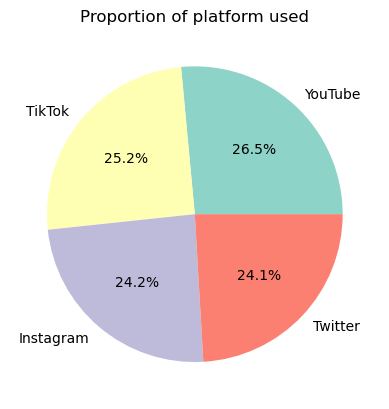

In [270]:
# tỉ lệ sử dụng các nền tảng
Platform_counts = df['Platform'].value_counts()
print(Platform_counts)

colors = sns.color_palette("Set3")[:4] 
plt.pie(Platform_counts, labels = Platform_counts.index, autopct = '%1.1f%%', colors = colors)
plt.title('Proportion of platform used')
plt.show()

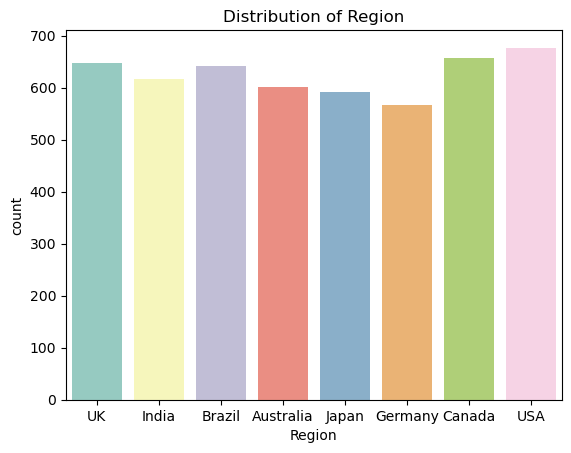

In [271]:
sns.countplot(data = df, x = 'Region', hue = 'Region', palette = 'Set3' )
plt.title('Distribution of Region')
plt.show()

Text(0.5, 1.0, 'Most popular platform in countries')

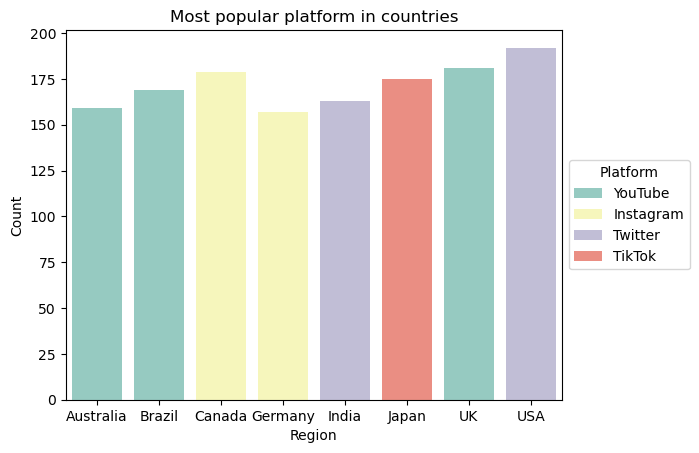

In [272]:
# các nền tảng phổ biến nhất ở các quốc gia
Region_Platform = df.groupby(['Platform', 'Region'], observed = False).size()
df_Region_Platform = Region_Platform.reset_index(name = 'Count')
Most_popular_platform = df_Region_Platform.sort_values('Count', ascending=False).groupby('Region').first()

sns.barplot(data = Most_popular_platform, x = 'Region', y ='Count', hue = 'Platform', palette = 'Set3')
plt.legend(title = 'Platform', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Most popular platform in countries')

C:\Users\HONG TUOI\AppData\Local\Temp\ipykernel_13520\87196402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Content_Type', palette = 'Set3')


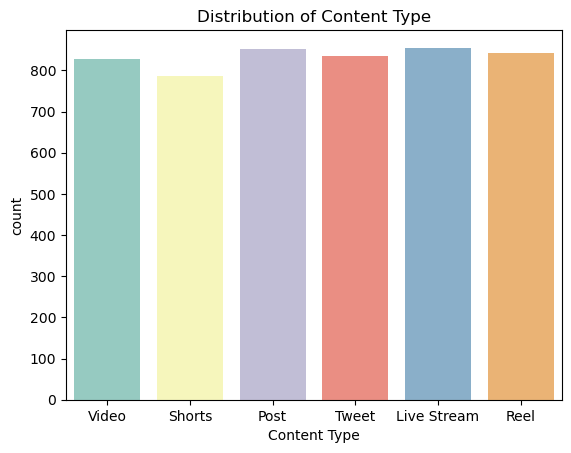

In [273]:
# Loại content được sử dụng
sns.countplot(data = df, x = 'Content_Type', palette = 'Set3')
plt.xlabel('Content Type')
plt.title('Distribution of Content Type')
plt.show()

Text(0.5, 1.0, 'Content Types on Platform')

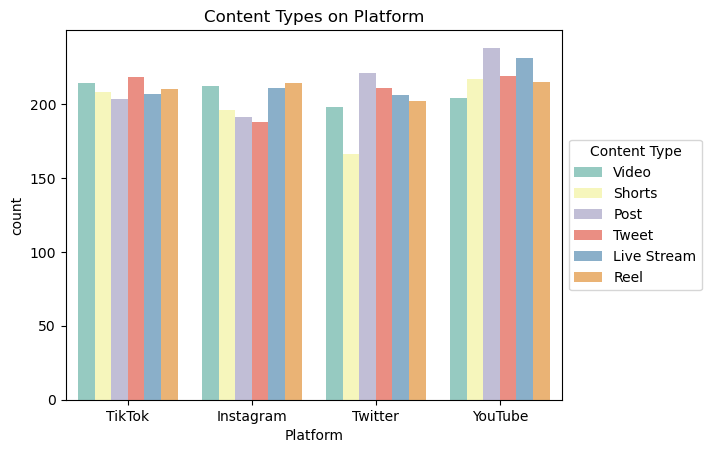

In [274]:
# Ở mỗi nền tảng, content nào phổ biến nhất
sns.countplot(data = df, hue = 'Content_Type', x = 'Platform', palette = 'Set3')
plt.legend(title = 'Content Type', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Content Types on Platform')

Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64


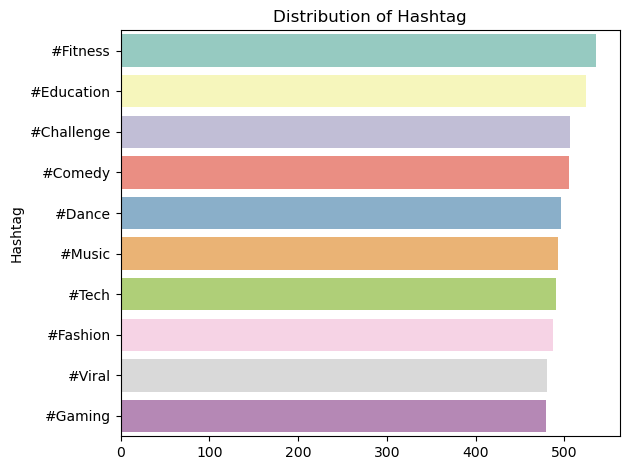

In [275]:
# Phân phối Hashtag
Hashtag_counts = df['Hashtag'].value_counts()
print(Hashtag_counts)

sns.barplot( x = Hashtag_counts.values, y = Hashtag_counts.index, hue = Hashtag_counts.index, palette = 'Set3', legend = False)
plt.title('Distribution of Hashtag')
plt.tight_layout()
plt.show()

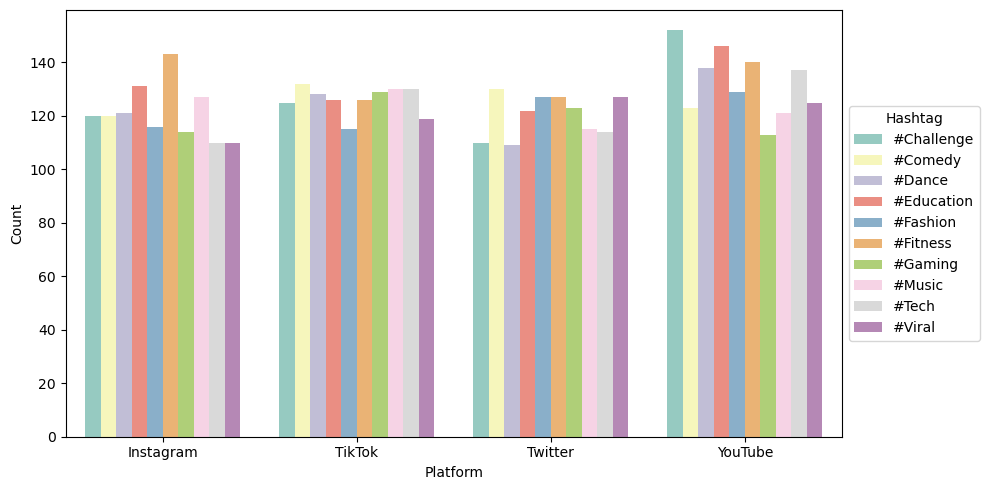

In [276]:
# Hashtag phổ biến ở các nền tảng
Platform_Hashtag = df.groupby(['Platform', 'Hashtag'], observed = False).size().reset_index(name = 'Count')
Platform_Hashtag 
plt.figure(figsize = (10,5))
sns.barplot(data = Platform_Hashtag, hue = 'Hashtag', y = 'Count', x = 'Platform', palette = 'Set3')
plt.legend(title = 'Hashtag', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt
plt.tight_layout()

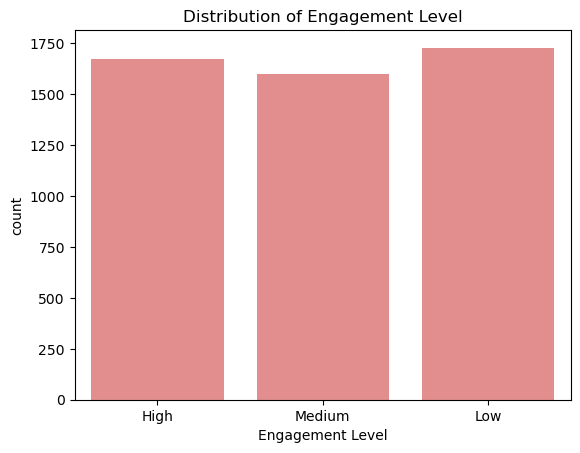

In [277]:
sns.countplot(data = df, x = 'Engagement_Level', color = 'lightcoral')
plt.xlabel('Engagement Level')
plt.title('Distribution of Engagement Level')
plt.show()

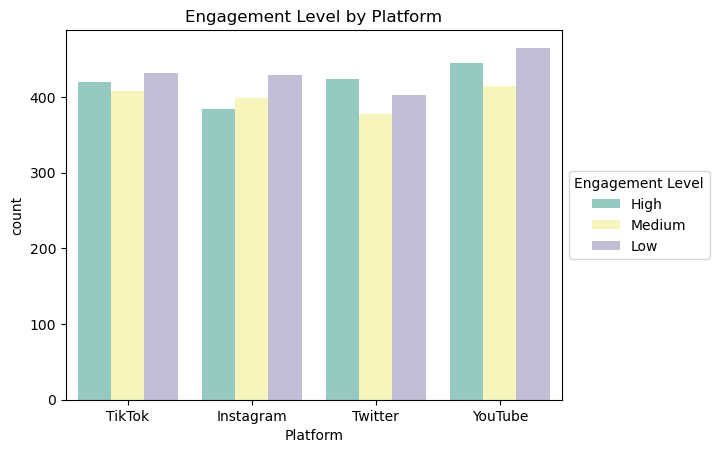

In [278]:
sns.countplot(data = df, x = 'Platform', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Engagement Level by Platform')
plt.show()

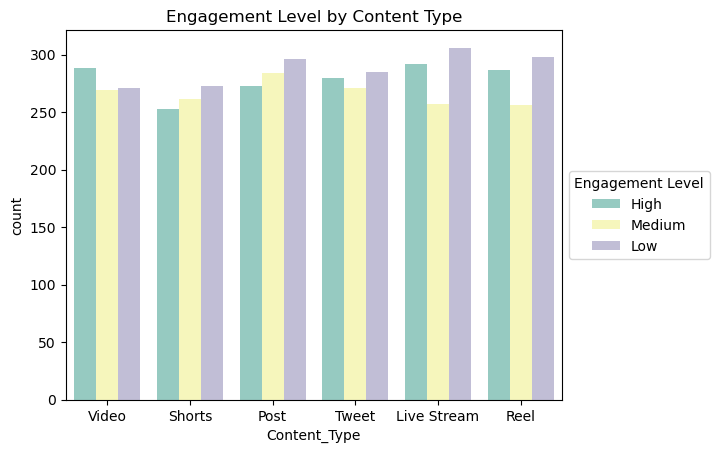

In [279]:
sns.countplot(data = df, x = 'Content_Type', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Engagement Level by Content Type')
plt.show()

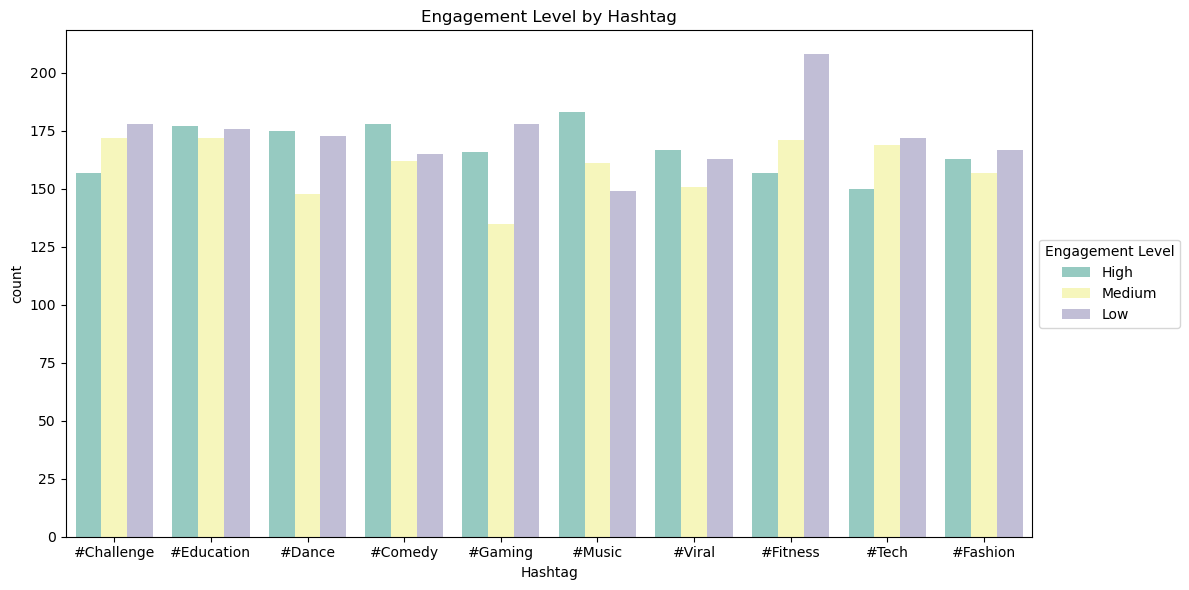

In [280]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'Hashtag', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Engagement Level by Hashtag')
plt.tight_layout()
plt.show()

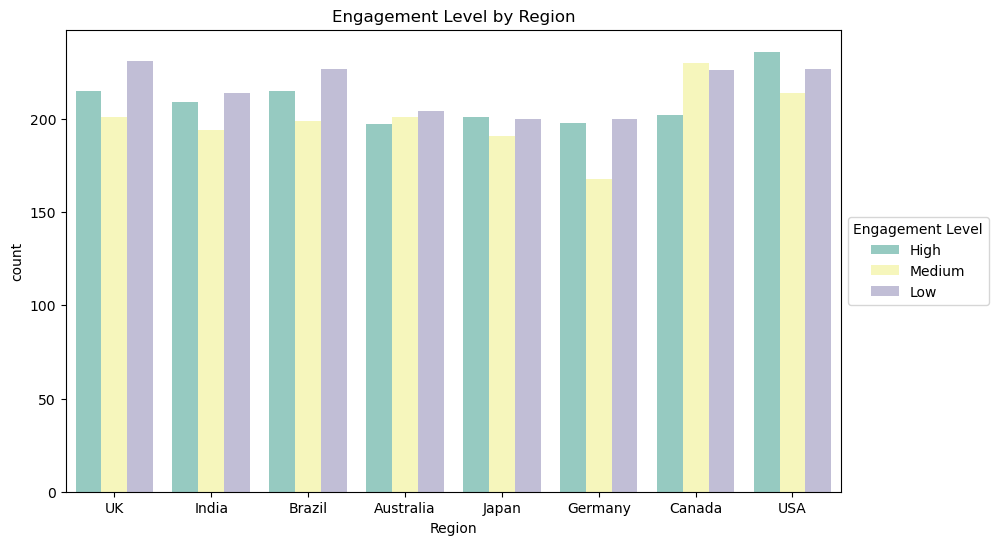

In [281]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Region', hue = 'Engagement_Level', palette = 'Set3')
plt.legend(title = 'Engagement Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Engagement Level by Region')
plt.show()

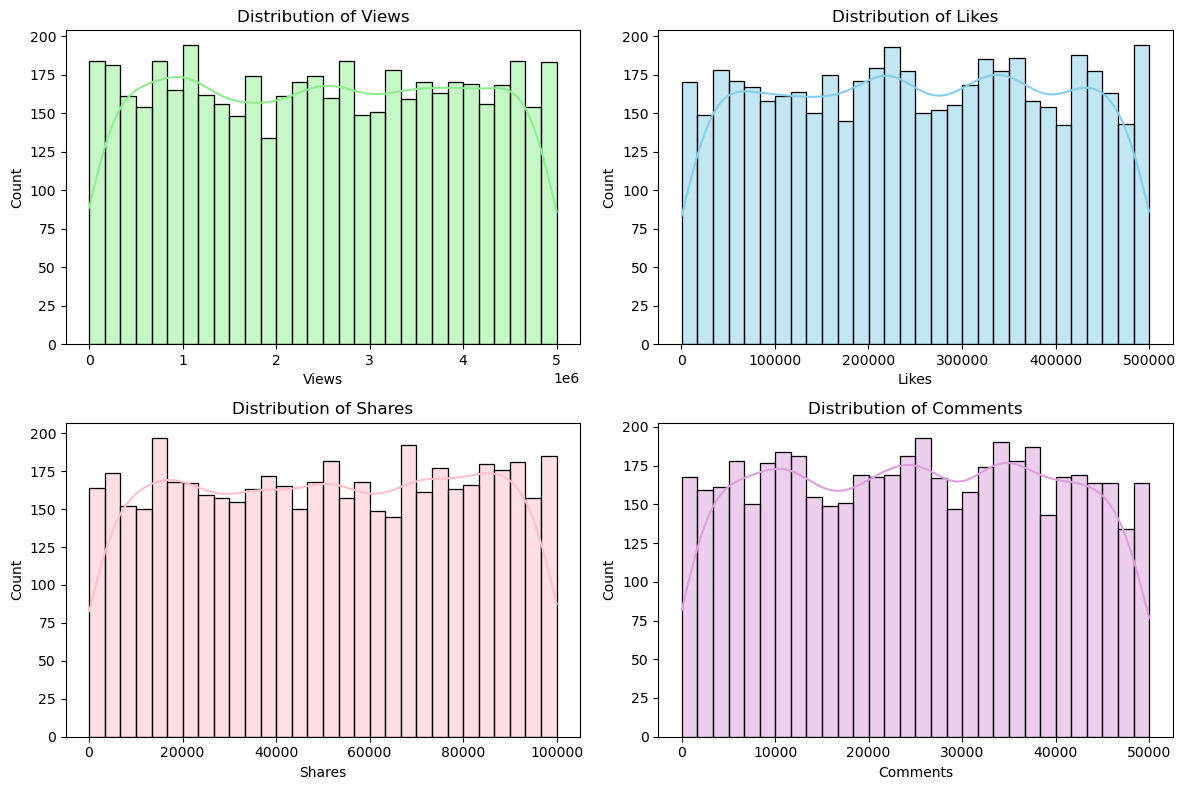

In [282]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['Views'], bins = 30, ax = axes[0,0], kde = True, color = 'Lightgreen')
axes[0, 0].set_title('Distribution of Views')

sns.histplot(df['Likes'],bins=30, ax = axes[0,1], kde = True, color = 'Skyblue')
axes[0, 1].set_title('Distribution of Likes')

sns.histplot(df['Shares'],bins=30, ax = axes[1,0], kde = True, color = 'Pink')
axes[1, 0].set_title('Distribution of Shares')

sns.histplot(df['Comments'],bins=30, ax = axes[1,1], kde = True, color = 'Plum')
axes[1, 1].set_title('Distribution of Comments')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Average Engagement Metrics by Platform')

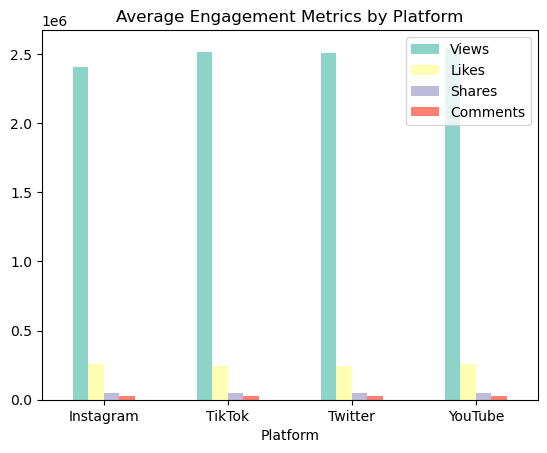

In [283]:
EngagementMetrics_Platform = df.groupby('Platform')[['Views', 'Likes', 'Shares', 'Comments']].mean()
colors = sns.color_palette("Set3")[:4] 
EngagementMetrics_Platform.plot(kind = 'bar', color = colors)
plt.xticks(rotation = 0)
plt.title('Average Engagement Metrics by Platform')

Text(0.5, 1.0, 'Average Engagement Metrics by Content Type')

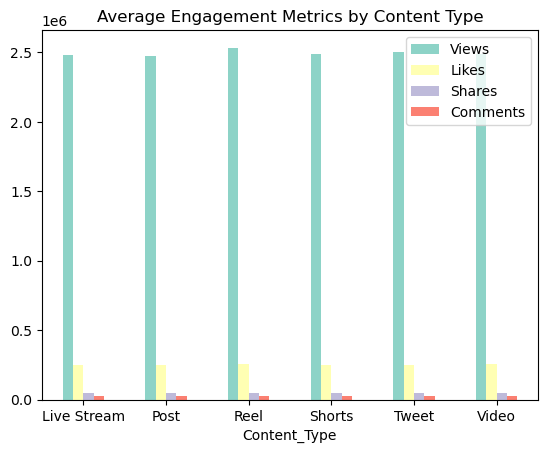

In [284]:
EngagementMetrics_Platform = df.groupby('Content_Type')[['Views', 'Likes', 'Shares', 'Comments']].mean()
colors = sns.color_palette("Set3")[:4] 
EngagementMetrics_Platform.plot(kind = 'bar', color = colors)
plt.xticks(rotation = 0)
plt.title('Average Engagement Metrics by Content Type')

Text(0.5, 1.0, 'Average Engagement Metrics by Hashtag')

<Figure size 1500x1000 with 0 Axes>

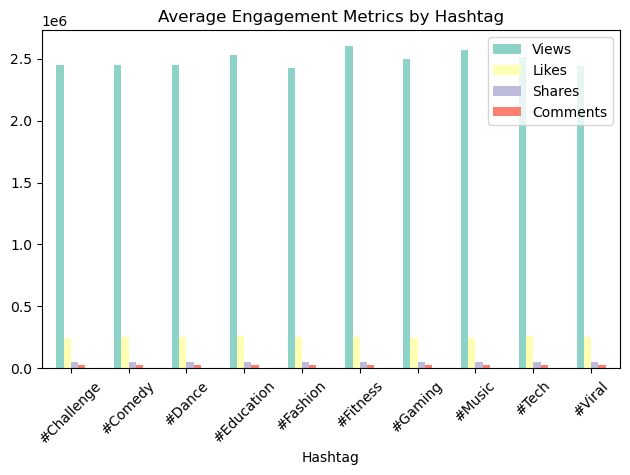

In [285]:
EngagementMetrics_Platform = df.groupby('Hashtag')[['Views', 'Likes', 'Shares', 'Comments']].mean()
plt.figure(figsize = (15, 10))
colors = sns.color_palette("Set3")[:4] 
EngagementMetrics_Platform.plot(kind = 'bar', color = colors)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Average Engagement Metrics by Hashtag')

Text(0.5, 1.0, 'Average Engagement Metrics by Region')

<Figure size 1500x1000 with 0 Axes>

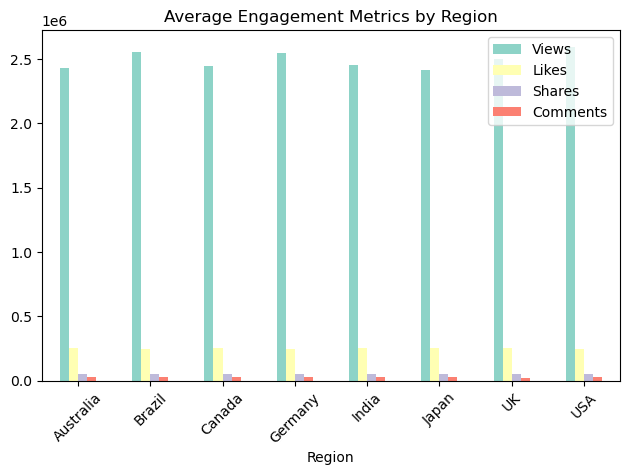

In [286]:
EngagementMetrics_Platform = df.groupby('Region')[['Views', 'Likes', 'Shares', 'Comments']].mean()
plt.figure(figsize = (15, 10))
colors = sns.color_palette("Set3")[:4] 
EngagementMetrics_Platform.plot(kind = 'bar', color = colors)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Average Engagement Metrics by Region')

C:\Users\HONG TUOI\AppData\Local\Temp\ipykernel_13520\769760229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Engagement_Level', y = 'Views', palette = 'Set3')


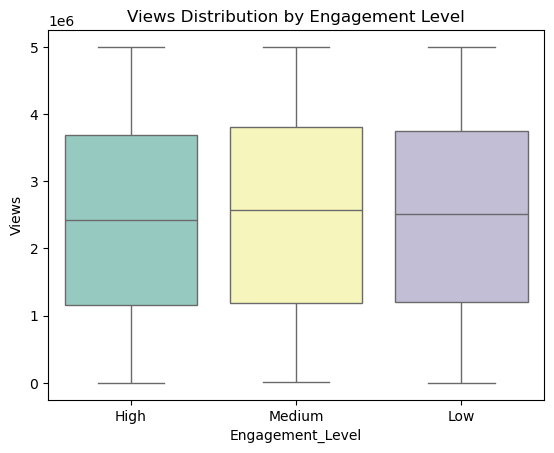

In [287]:
sns.boxplot(data = df, x = 'Engagement_Level', y = 'Views', palette = 'Set3')
plt.title('Views Distribution by Engagement Level')
plt.show()

C:\Users\HONG TUOI\AppData\Local\Temp\ipykernel_13520\4039202080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Engagement_Level', y = 'Likes', palette = 'Set3')


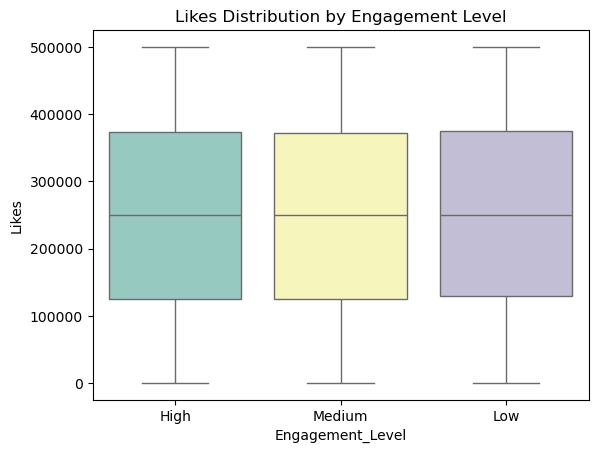

In [288]:
sns.boxplot(data = df, x = 'Engagement_Level', y = 'Likes', palette = 'Set3')
plt.title('Likes Distribution by Engagement Level')
plt.show()

C:\Users\HONG TUOI\AppData\Local\Temp\ipykernel_13520\827328656.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Engagement_Level', y = 'Comments', palette = 'Set3')


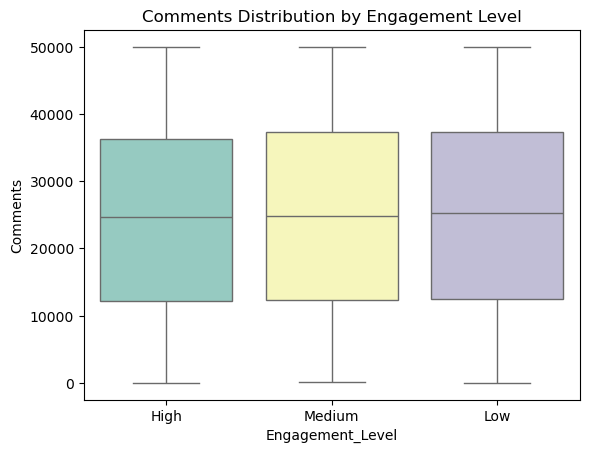

In [289]:
sns.boxplot(data = df, x = 'Engagement_Level', y = 'Comments', palette = 'Set3')
plt.title('Comments Distribution by Engagement Level')
plt.show()

C:\Users\HONG TUOI\AppData\Local\Temp\ipykernel_13520\1143074606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Engagement_Level', y = 'Shares', palette = 'Set3')


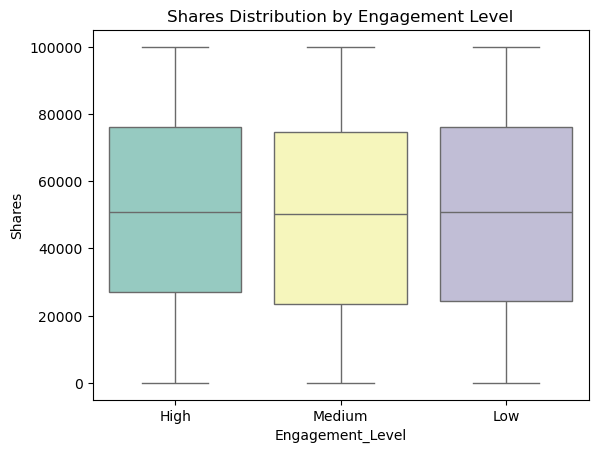

In [290]:
sns.boxplot(data = df, x = 'Engagement_Level', y = 'Shares', palette = 'Set3')
plt.title('Shares Distribution by Engagement Level')
plt.show()

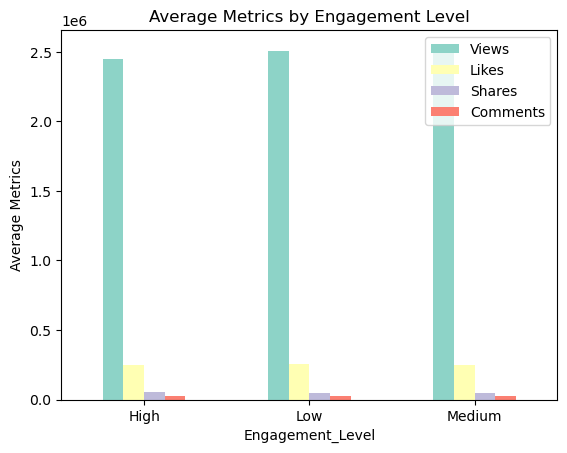

In [291]:
Engagement_metrics = df.groupby('Engagement_Level')[['Views','Likes', 'Shares','Comments']].mean()
colors = sns.color_palette("Set3")[:4] 
Engagement_metrics.plot(kind = 'bar', color = colors)
plt.ylabel('Average Metrics')
plt.xticks(rotation = 0)
plt.title('Average Metrics by Engagement Level')
plt.show()

Feature engineering

In [292]:
df['Like_rate'] = df['Likes']/df['Views']
df['Share_rate'] = df['Shares']/df['Views']
df['Comment_rate'] = df['Comments']/df['Views']
df['total_engagement'] = df['Likes'] + df['Shares'] + df['Comments']
df['engagement_rate'] = df['total_engagement']/df['Views']
numerical_cols = ['Views', 'Likes', 'Shares', 'Comments']

In [293]:
q1 = df['engagement_rate'].quantile(0.33)  
q2 = df['engagement_rate'].quantile(0.66) 
def label_engagement(rate):
    if rate < q1:
        return 'Low'
    elif rate < q2:
        return 'Medium'
    else:
        return 'High'

# Gán nhãn theo engagement_rate
df['Engagement_Level_New'] = df['engagement_rate'].apply(label_engagement)

In [294]:
print(df)

       Platform     Hashtag Content_Type     Region    Views   Likes  Shares  \
0        TikTok  #Challenge        Video         UK  4163464  339431   53135   
1     Instagram  #Education       Shorts      India  4155940  215240   65860   
2       Twitter  #Challenge        Video     Brazil  3666211  327143   39423   
3       YouTube  #Education       Shorts  Australia   917951  127125   11687   
4        TikTok      #Dance         Post     Brazil    64866  171361   69581   
...         ...         ...          ...        ...      ...     ...     ...   
4995    YouTube  #Education        Video      Japan  4258236  381509   59209   
4996  Instagram  #Education        Video         UK  4841525  166266   54841   
4997    YouTube    #Fashion       Shorts        USA  2004080   32401   75229   
4998  Instagram     #Gaming       Shorts     Canada  2221665   46996   12954   
4999  Instagram    #Fashion         Reel      Japan  2224007   72744   29945   

      Comments Engagement_Level  Like_r

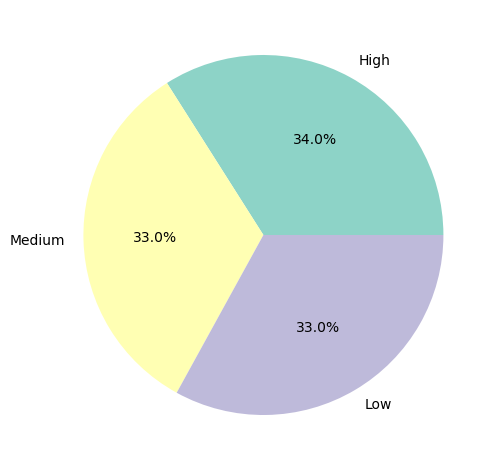

In [295]:
Engagement_Level_counts = df['Engagement_Level_New'].value_counts()

colors = sns.color_palette("Set3")[:4] 
plt.pie(Engagement_Level_counts, labels = Engagement_Level_counts.index, autopct = '%1.1f%%', colors = colors)
plt.tight_layout()
plt.show()

In [296]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Engagement_Level'] = label_encoder.fit_transform(df['Engagement_Level'])
df['Engagement_Level_New'] = label_encoder.fit_transform(df['Engagement_Level_New'])

In [297]:
corr_spearman = df['Engagement_Level'].corr(df['Engagement_Level_New'], method = 'spearman')
print(f'Spearman correlation: {corr_spearman}')

Spearman correlation: 0.007121294756277159


In [298]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [299]:
# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [300]:
print('\n Dữ liệu sau khi Feature Engineering')
print(df)


 Dữ liệu sau khi Feature Engineering
       Platform     Hashtag Content_Type     Region     Views     Likes  \
0        TikTok  #Challenge        Video         UK  1.143937  0.609387   
1     Instagram  #Education       Shorts      India  1.138781 -0.251048   
2       Twitter  #Challenge        Video     Brazil  0.803200  0.524252   
3       YouTube  #Education       Shorts  Australia -1.080016 -0.861537   
4        TikTok      #Dance         Post     Brazil -1.664584 -0.555056   
...         ...         ...          ...        ...       ...       ...   
4995    YouTube  #Education        Video      Japan  1.208879  0.900917   
4996  Instagram  #Education        Video         UK  1.608571 -0.590355   
4997    YouTube    #Fashion       Shorts        USA -0.335758 -1.517815   
4998  Instagram     #Gaming       Shorts     Canada -0.186660 -1.416696   
4999  Instagram    #Fashion         Reel      Japan -0.185055 -1.238306   

        Shares  Comments  Engagement_Level  Like_rate  Share_

Xây dựng mô hình

In [301]:
X = df[numerical_cols]
y = df['Engagement_Level_New']

In [302]:
#Chia dữ liệu thành tập train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import auc, roc_auc_score

In [304]:
rf_model = RandomForestClassifier(max_depth=10,n_estimators=100, random_state=42, class_weight = 'balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score (Random Forest - SMOTE):", roc_auc_score(y_test, y_proba_rf, multi_class='ovr', average='weighted'))


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       361
           1       0.97      0.98      0.97       329
           2       0.96      0.95      0.95       310

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

ROC-AUC Score (Random Forest - SMOTE): 0.9979956860727784


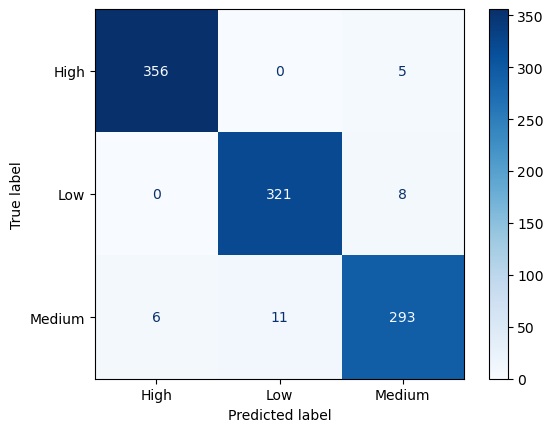

In [305]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=label_encoder.classes_)
disp.plot(cmap = plt.cm.Blues)